In [120]:
import pandas as pd
import numpy as np


In [121]:
sales_df = pd.read_csv("sales_data.csv")
product_df = pd.read_csv("product_info.csv")
customer_df = pd.read_csv("customer_info.csv")
print("The sales data Info is")
print(sales_df.info())
display(sales_df.head())
print("The product data Info is")
print(product_df.info())
display(product_df.head())
print("The customer data Info is")
print(customer_df.info())
display(customer_df.head())

The sales data Info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB
None


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


The product data Info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB
None


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


The customer data Info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB
None


,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [122]:
sales = sales_df.copy()
product = product_df.copy()
customer = customer_df.copy()

In [123]:
missing_countsale = sales.isnull().sum()
print("The nº of missing values per column on Sale is")
print(missing_countsale)
missing_countproduct = product.isnull().sum()
print("The nº of missing values per column on Product is")
print(missing_countproduct)
missing_countcostomer = customer.isnull().sum()
print("The nº of missing values per column on Customer is")
print(missing_countcostomer)

The nº of missing values per column on Sale is
order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64
The nº of missing values per column on Product is
product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
The nº of missing values per column on Customer is
customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64


In [124]:
for col in ["delivery_status", "payment_method", "region"]:
    sales[col] = sales[col].astype(str).str.strip().str.title()

In [125]:
print("The tex values on deliver_status in sale are:")
sales["delivery_status"].value_counts(dropna=False)

The tex values on deliver_status in sale are:


delivery_status
Delivered    1231
Delayed      1173
Cancelled     591
Nan             3
Delrd           1
Delyd           1
Name: count, dtype: int64

In [126]:

sales["delivery_status"] = sales["delivery_status"].replace({
    'Delrd': 'Delivered',
    'Delyd': 'Delayed',
    'Nan': np.nan  
})
sales["delivery_status"] = sales["delivery_status"].fillna("Unknown")
print("The Standardising tex values on deliver_status in sale are:")
sales["delivery_status"].value_counts(dropna=False)

The Standardising tex values on deliver_status in sale are:


delivery_status
Delivered    1232
Delayed      1174
Cancelled     591
Unknown         3
Name: count, dtype: int64

In [127]:
print("The tex values on payment_method in sale are:")
sales["payment_method"].value_counts(dropna=False)

The tex values on payment_method in sale are:


payment_method
Credit Card      1453
Bank Transfer     780
Paypal            763
Nan                 3
Bank Transfr        1
Name: count, dtype: int64

In [128]:
sales["payment_method"] = sales["payment_method"].replace({
    "Bank Transfr": "Bank Transfer",
    "Nan": np.nan
})
sales["payment_method"] = sales["payment_method"].fillna("Unknown")
print("The Standardising text values on payment_method in sale are:")
sales["payment_method"].value_counts(dropna=False)

The Standardising text values on payment_method in sale are:


payment_method
Credit Card      1453
Bank Transfer     781
Paypal            763
Unknown             3
Name: count, dtype: int64

In [129]:
print("The tex values on region in sale are:")
sales["region"].value_counts(dropna=False)

The tex values on region in sale are:


region
North      605
Central    603
East       602
South      596
West       593
Nrth         1
Name: count, dtype: int64

In [130]:
sales["region"] = sales["region"].replace({
    'Nrth': 'North'
})
print("The Standardising tex values on regio in sale are:")
sales["region"].value_counts(dropna=False)

The Standardising tex values on regio in sale are:


region
North      606
Central    603
East       602
South      596
West       593
Name: count, dtype: int64

In [131]:
for col in ["product_name", "category", "supplier_code"]:
    product[col] = product[col].astype(str).str.strip()

In [132]:
for col in ["email", "gender", "region", "loyalty_tier"]:
    customer[col] = customer[col].astype(str).str.strip() .str.title()

In [133]:
customer["email"] = customer["email"].replace({"Nan": np.nan}).fillna("unknown@example.com")

In [134]:
print("The tex values on gender in customer are:")
customer_df["gender"].value_counts(dropna=False)

The tex values on gender in customer are:


gender
femle     92
male      88
FEMALE    85
Male      81
Other     77
Female    73
NaN        4
Name: count, dtype: int64

In [135]:
customer["gender"] = (
    customer["gender"]
    .astype(str)
    .str.strip()
    .str.title()
)

customer["gender"] = customer["gender"].replace({
    "femle": "Female",
    "Nan": np.nan
})
customer["gender"] = customer["gender"].fillna("Unknown")
customer["gender"].value_counts(dropna=False)

gender
Male       169
Female     158
Femle       92
Other       77
Unknown      4
Name: count, dtype: int64

In [136]:
print("The tex values on gender in region are:")
customer["region"].value_counts(dropna=False)

The tex values on gender in region are:


region
East       103
North      101
West       100
South       99
Central     94
Nan          3
Name: count, dtype: int64

In [ ]:
customer["region"] = customer["region"].replace("Nan", np.nan)  
customer["region"] = customer["region"].fillna("Unknown")
customer["region"].value_counts(dropna=False)

region
East       103
North      101
West       100
South       99
Central     94
Unknown      3
Name: count, dtype: int64

In [ ]:
print("The tex values on gender in loyalty_tier are:")
customer["loyalty_tier"].value_counts(dropna=False)

The tex values on gender in loyalty_tier are:


loyalty_tier
Gold      263
Silver    118
Bronze    112
Gld         2
Nan         2
Brnze       2
Sllver      1
Name: count, dtype: int64

In [139]:
customer["loyalty_tier"] = (
    customer["loyalty_tier"]
    .astype(str)
    .str.strip()
    .str.title()
)
customer["loyalty_tier"] = customer["loyalty_tier"].replace({
    "Gld": "Gold",
    "Brnze": "Bronze",
    "Sllver": "Silver",
    "Nan": np.nan
})
customer["loyalty_tier"] = customer["loyalty_tier"].fillna("Unknown")
customer["loyalty_tier"].value_counts(dropna=False)

loyalty_tier
Gold       265
Silver     119
Bronze     114
Unknown      2
Name: count, dtype: int64

In [140]:
sales["order_date"] = pd.to_datetime(
    sales["order_date"], dayfirst=True, errors="coerce"
)
product["launch_date"] = pd.to_datetime(
    product["launch_date"], dayfirst=True, errors="coerce"
)
customer["signup_date"] = pd.to_datetime(
    customer["signup_date"], dayfirst=True, errors="coerce"
)

C:\Users\selma\AppData\Local\Temp\ipykernel_62040\1724991933.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product["launch_date"] = pd.to_datetime(
C:\Users\selma\AppData\Local\Temp\ipykernel_62040\1724991933.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer["signup_date"] = pd.to_datetime(


In [141]:
sales["quantity"] = pd.to_numeric(sales["quantity"], errors="coerce")
sales["unit_price"] = pd.to_numeric(sales["unit_price"], errors="coerce")
sales["discount_applied"] = pd.to_numeric(sales["discount_applied"], errors="coerce")
sales["discount_applied"] = sales["discount_applied"].fillna(0.0)
sales = sales[
    (sales["quantity"] >= 0)
    & (sales["unit_price"] >= 0)
    & (sales["discount_applied"] >= 0)
]
sales = sales.dropna(
    subset=["order_id", "customer_id", "product_id", "order_date", "quantity", "unit_price"]
)
sales = sales.drop_duplicates()
print("The cleaned sales data Info is")
print(sales.info())

The cleaned sales data Info is
<class 'pandas.core.frame.DataFrame'>
Index: 2984 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2984 non-null   object        
 1   customer_id       2984 non-null   object        
 2   product_id        2984 non-null   object        
 3   quantity          2984 non-null   float64       
 4   unit_price        2984 non-null   float64       
 5   order_date        2984 non-null   datetime64[ns]
 6   delivery_status   2984 non-null   object        
 7   payment_method    2984 non-null   object        
 8   region            2984 non-null   object        
 9   discount_applied  2984 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 256.4+ KB
None


In [142]:
product["base_price"] = pd.to_numeric(product["base_price"], errors="coerce")
product = product.drop_duplicates(subset=["product_id"])
print("The cleaned product data Info is")
print(product.info())


The cleaned product data Info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     object        
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ KB
None


In [143]:
customer = customer.drop_duplicates(subset=["customer_id"])
customer = customer.dropna(subset=["customer_id", "signup_date"])
print("The cleaned customer data Info is")
print(customer.info())

The cleaned customer data Info is
<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   493 non-null    object        
 1   email         493 non-null    object        
 2   signup_date   493 non-null    datetime64[ns]
 3   gender        493 non-null    object        
 4   region        493 non-null    object        
 5   loyalty_tier  493 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 27.0+ KB
None


In [144]:
merged = (
    sales
    .merge(product, on="product_id", how="left")
    .merge(customer, on="customer_id", how="left", suffixes=("_x", "_y"))
)

print("Merged data is:")
merged.info()
display(merged.head())

Merged data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2984 non-null   object        
 1   customer_id       2984 non-null   object        
 2   product_id        2984 non-null   object        
 3   quantity          2984 non-null   float64       
 4   unit_price        2984 non-null   float64       
 5   order_date        2984 non-null   datetime64[ns]
 6   delivery_status   2984 non-null   object        
 7   payment_method    2984 non-null   object        
 8   region_x          2984 non-null   object        
 9   discount_applied  2984 non-null   float64       
 10  product_name      2984 non-null   object        
 11  category          2984 non-null   object        
 12  launch_date       2984 non-null   datetime64[ns]
 13  base_price        2984 non-null   float64       
 14  supplier

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,Jacquelinemartin@Mills-Logan.Com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,Georgeweber@Morgan.Com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,Lcook@Walters-Smith.Com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,Smoore@Gmail.Com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,Mcclainkatherine@Hotmail.Com,2024-09-18,Male,Central,Gold


In [145]:
merged["revenue"] = (
    merged["quantity"] * merged["unit_price"] * (1 - merged["discount_applied"])
)

iso = merged["order_date"].dt.isocalendar()
merged["order_week"] = iso.week
merged["order_year"] = iso.year

max_price = merged["unit_price"].max()
bins = [0, 15, 30, max_price + 1]
labels = ["Low", "Medium", "High"]
merged["price_band"] = pd.cut(
    merged["unit_price"],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True,
)

merged["days_to_order"] = (merged["order_date"] - merged["launch_date"]).dt.days

merged["email_domain"] = merged["email"].str.split("@").str[-1]

merged["is_late"] = merged["delivery_status"].eq("Delayed")

merged["signup_date"] = pd.to_datetime(merged["signup_date"], errors="coerce")
merged["signup_month"] = merged["signup_date"].dt.to_period("M").astype(str)

print("Merged data is:")
merged.info()


Merged data is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2984 non-null   object        
 1   customer_id       2984 non-null   object        
 2   product_id        2984 non-null   object        
 3   quantity          2984 non-null   float64       
 4   unit_price        2984 non-null   float64       
 5   order_date        2984 non-null   datetime64[ns]
 6   delivery_status   2984 non-null   object        
 7   payment_method    2984 non-null   object        
 8   region_x          2984 non-null   object        
 9   discount_applied  2984 non-null   float64       
 10  product_name      2984 non-null   object        
 11  category          2984 non-null   object        
 12  launch_date       2984 non-null   datetime64[ns]
 13  base_price        2984 non-null   float64       
 14  supplier

In [146]:
weekly_rev = (
    merged.groupby(["order_year", "order_week"])["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
)

print("The weekly revenue trends (all regions) are:")
weekly_rev.head(3)



The weekly revenue trends (all regions) are:


,order_year,order_week,revenue
16,2025,30,18300.1670
15,2025,29,17279.8930
14,2025,28,17212.8305


In [147]:
weekly_region_rev = (
    merged.groupby(["order_year", "order_week", "region_x"])["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
)

print("The weekly revenue trends by region are:")
weekly_region_rev.head(3)

The weekly revenue trends by region are:


,order_year,order_week,region_x,revenue
69,2025,28,West,4886.0895
46,2025,24,East,4552.5730
40,2025,23,Central,4454.7780


In [148]:
category_rev = (
    merged.groupby("category")["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
)

total_revenue = category_rev["revenue"].sum()
category_rev["perc"] = (category_rev["revenue"] / total_revenue) * 100

print("The product category performance is:")
display(category_rev)

merged["region_x"] = (
    merged["region_x"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({"Nrth": "North"})
)
cat_region = (
    merged.groupby(["region_x", "category"])["revenue"]
    .sum()
    .reset_index()
)

cat_region_sorted = cat_region.sort_values(
    ["region_x", "revenue"],
    ascending=[True, False]
)

top_category_by_region = cat_region_sorted.groupby("region_x").head(1)

print("The product category performance by region is:")
display(top_category_by_region)


The product category performance is:


,category,revenue,perc
0,Cleaning,93445.6795,39.045839
4,Storage,46931.4575,19.610090
2,Outdoors,40060.5600,16.739117
1,Kitchen,33993.0415,14.203833
3,Personal Care,24892.2765,10.401121


The product category performance by region is:


,region_x,category,revenue
0,Central,Cleaning,17927.9775
5,East,Cleaning,19911.2990
10,North,Cleaning,18766.1035
15,South,Cleaning,18887.3650
20,West,Cleaning,17952.9345


In [149]:
loyalty_rev = (
    merged.groupby("loyalty_tier")["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
)

total_loyalty_rev = loyalty_rev["revenue"].sum()
loyalty_rev["perc"] = loyalty_rev["revenue"] / total_loyalty_rev * 100


print("The customer behaviour by loyalty tier and signup_month is")
loyalty_rev

The customer behaviour by loyalty tier and signup_month is


,loyalty_tier,revenue,perc
1,Gold,134881.752,57.204602
2,Silver,52032.608,22.067512
0,Bronze,48106.655,20.402479
3,Unknown,767.273,0.325408


In [150]:
delay_rates = (
    merged.groupby("region_x")["is_late"]
    .mean()
    .reset_index()
)

delay_rates["is_late"] = delay_rates["is_late"] * 100

print("The delivery performance by region and price band is")
delay_rates

price_delay = (
    merged.groupby(["region_x", "price_band"])["is_late"]
    .mean()
    .reset_index()
)

price_delay["is_late"] = price_delay["is_late"] * 100
price_delay

The delivery performance by region and price band is


C:\Users\selma\AppData\Local\Temp\ipykernel_62040\1869793788.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby(["region_x", "price_band"])["is_late"]


,region_x,price_band,is_late
0,Central,Low,38.392857
1,Central,Medium,39.111111
2,Central,High,39.543726
3,East,Low,41.052632
4,East,Medium,42.796610
5,East,High,40.977444
6,North,Low,38.317757
7,North,Medium,43.902439
8,North,High,36.177474
9,South,Low,32.989691


In [151]:
payment_loyalty = (
    merged
    .groupby(["loyalty_tier", "payment_method"])
    .agg(
        orders=("order_id", "nunique"),
        total_revenue=("revenue", "sum")
    )
    .reset_index()
)
print("The preferred payment methods by loyalty tier is")
display(payment_loyalty.head())

The preferred payment methods by loyalty tier is


,loyalty_tier,payment_method,orders,total_revenue
0,Bronze,Bank Transfer,175,13777.6895
1,Bronze,Credit Card,278,21893.9165
2,Bronze,Paypal,160,12435.0490
3,Gold,Bank Transfer,401,33546.2775
4,Gold,Credit Card,830,66712.5365


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

The Line plot is


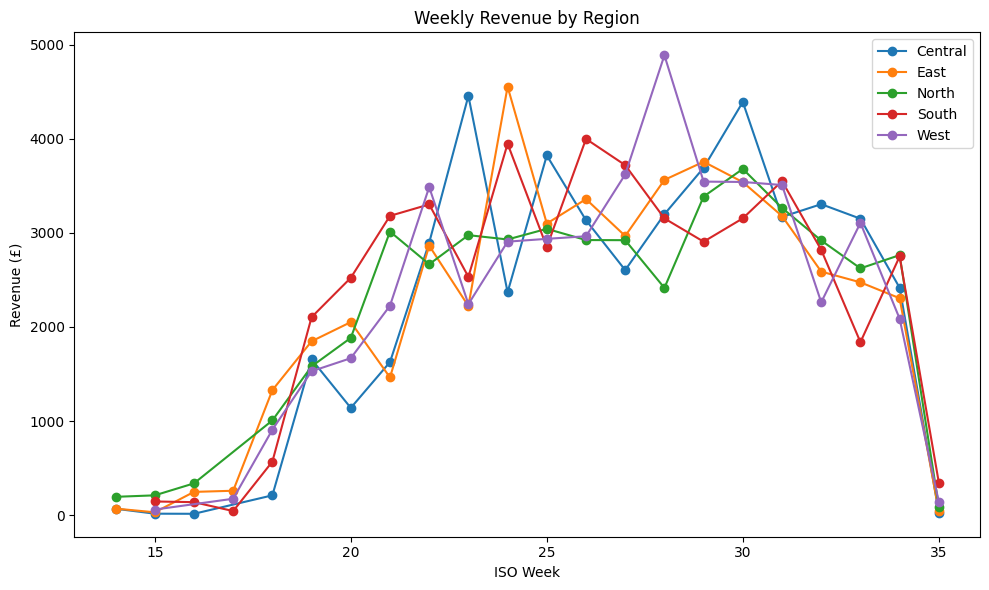

In [153]:
weekly_total = (
    merged
    .groupby(["order_year", "order_week", "region_x"])["revenue"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 6))
for region in weekly_total["region_x"].unique():
    subset = weekly_total[weekly_total["region_x"] == region]
    plt.plot(
        subset["order_week"],
        subset["revenue"],
        marker="o",
        label=region,
    )
print("The Line plot is")
plt.xlabel("ISO Week")
plt.ylabel("Revenue (£)")
plt.title("Weekly Revenue by Region")
plt.legend()
plt.tight_layout()
plt.show()

The Bar chart is


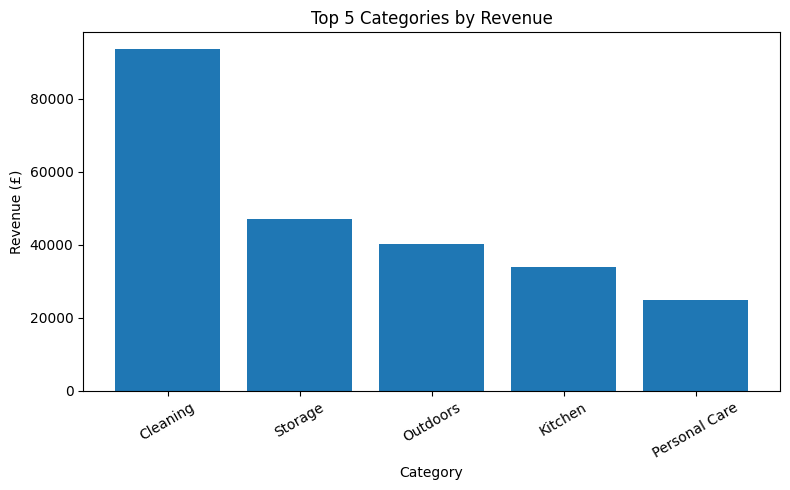

In [154]:
cat_rev = (
    merged
    .groupby("category")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)
print("The Bar chart is")
plt.figure(figsize=(8, 5))
plt.bar(cat_rev["category"], cat_rev["revenue"])
plt.xlabel("Category")
plt.ylabel("Revenue (£)")
plt.title("Top 5 Categories by Revenue")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The Boxplot is


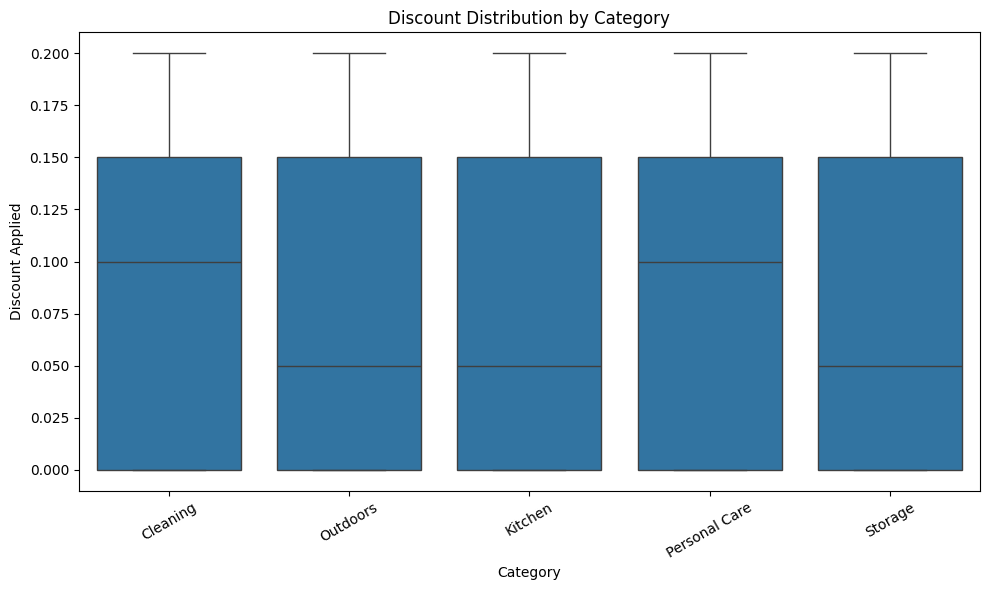

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged,
    x="category",
    y="discount_applied",
)
print("The Boxplot is")
plt.xlabel("Category")
plt.ylabel("Discount Applied")
plt.title("Discount Distribution by Category")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

The Heatmap is


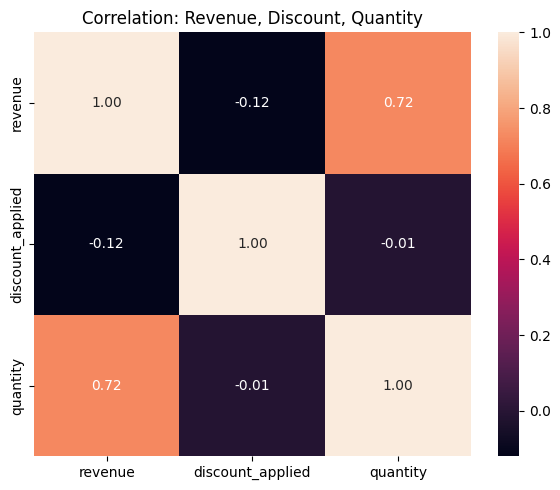

In [156]:
corr_cols = merged[["revenue", "discount_applied", "quantity"]].corr()
print("The Heatmap is")
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_cols,
    annot=True,
    fmt=".2f",
)
plt.title("Correlation: Revenue, Discount, Quantity")
plt.tight_layout()
plt.show()

The Countplot is


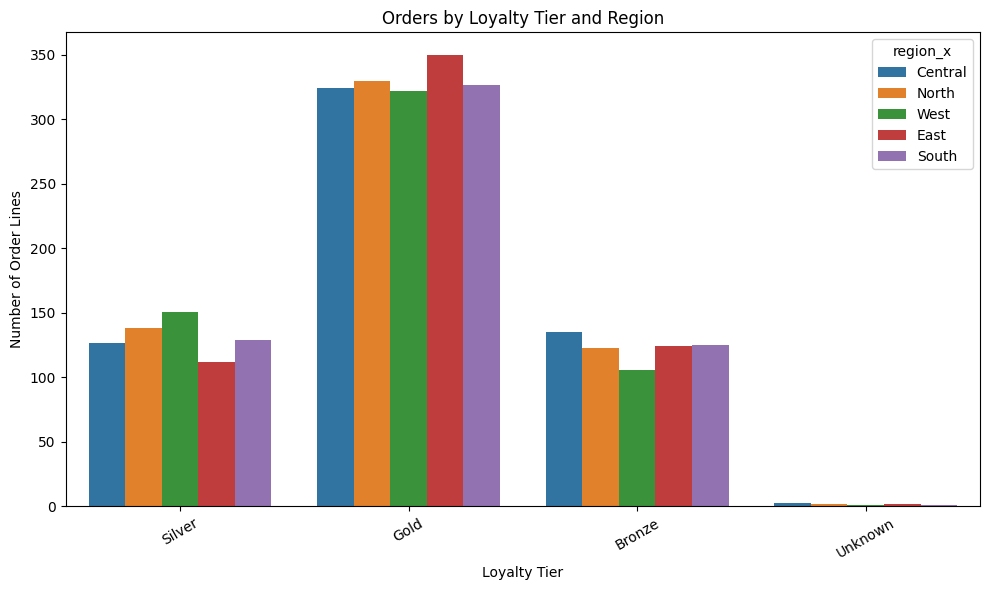

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=merged,
    x="loyalty_tier",
    hue="region_x",
)
print("The Countplot is")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of Order Lines")
plt.title("Orders by Loyalty Tier and Region")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\selma\AppData\Local\Temp\ipykernel_62040\1779310462.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["price_band", "delivery_status"])["order_id"]


The Stacked bar is


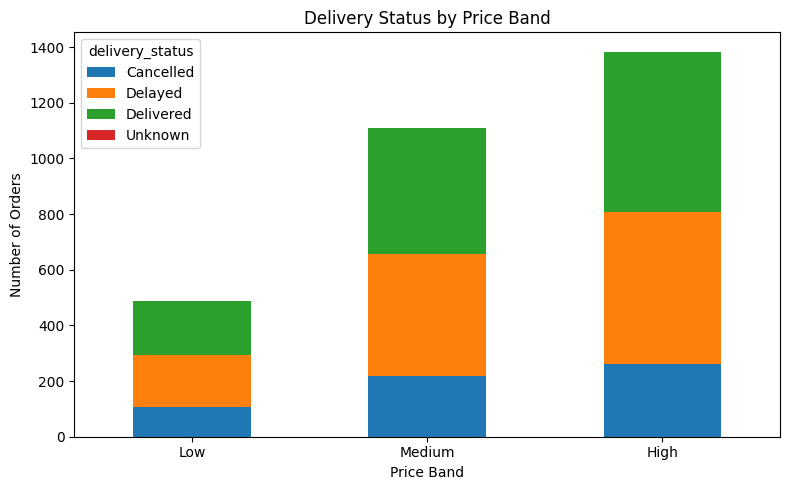

In [158]:
status_price = (
    merged
    .groupby(["price_band", "delivery_status"])["order_id"]
    .nunique()
    .unstack(fill_value=0)
)

status_price.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
)
print("The Stacked bar is")
plt.xlabel("Price Band")
plt.ylabel("Number of Orders")
plt.title("Delivery Status by Price Band")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [159]:
# 1. Create discount bands from discount_applied
merged["discount_band"] = pd.cut(
    merged["discount_applied"],
    bins=[0, 0.05, 0.10, 0.20, 1.0],
    labels=["0–5%", "5–10%", "10–20%", ">20%"],
    include_lowest=True,
    right=True
)

# Optional: check how many rows in each band
print("Counts per discount band:")
print(merged["discount_band"].value_counts(dropna=False))


# 2. Average quantity per discount band
discount_qty = (
    merged.groupby("discount_band")["quantity"]
    .mean()
    .reset_index()
    .sort_values("discount_band")
)

print("\nAverage quantity per discount band:")
print(discount_qty)


# 3. Correlation between discount_applied and quantity
corr_discount_qty = merged["discount_applied"].corr(merged["quantity"])
print("\nCorrelation between discount_applied and quantity:", corr_discount_qty)

Counts per discount band:
discount_band
0–5%      1494
10–20%     984
5–10%      506
>20%         0
Name: count, dtype: int64

Average quantity per discount band:
  discount_band  quantity
0          0–5%  3.027443
1         5–10%  2.982213
2        10–20%  2.969512
3          >20%       NaN

Correlation between discount_applied and quantity: -0.011630846529497613


C:\Users\selma\AppData\Local\Temp\ipykernel_62040\3659954321.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged.groupby("discount_band")["quantity"]


In [160]:
merged["signup_month"] = merged["signup_date"].dt.to_period("M").astype(str)

cohort_rev = (
    merged.groupby("signup_month")["revenue"]
    .sum()
    .reset_index()
)

cohort_counts = (
    merged.groupby("signup_month")["customer_id"]
    .nunique()
    .reset_index()
    .rename(columns={"customer_id": "unique_customers"})
)

cohort = cohort_rev.merge(cohort_counts, on="signup_month")
cohort["rev_per_customer"] = cohort["revenue"] / cohort["unique_customers"]

cohort.sort_values("signup_month")

,signup_month,revenue,unique_customers,rev_per_customer
0,2024-07,17487.3730,36,485.760361
1,2024-08,23753.8100,49,484.771633
2,2024-09,18603.8720,42,442.949333
3,2024-10,22479.3110,49,458.761449
4,2024-11,21858.3000,45,485.740000
5,2024-12,20225.5205,45,449.456011
6,2025-01,17668.7545,40,441.718863
7,2025-02,23690.2700,43,550.936512
8,2025-03,19789.6540,37,534.855514
9,2025-04,15235.6920,34,448.108588
